#Step 1: Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Step 2: Load the Dataset

In [16]:
data=pd.read_csv("/content/Cardiotocographic.csv")
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [18]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


#Step 3: Handle Missing Values

In [19]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

data = data.dropna(axis=0)
print("Missing values after cleaning:\n", data.isnull().sum())


Missing values in each column:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64
Missing values after cleaning:
 LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


#Step 4: Data Type Correction and Outlier Detection

In [20]:
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outliers = np.where(z_scores > 3)
print("Number of outliers detected:", len(outliers[0]))

data = data[(z_scores < 3).all(axis=1)]

Number of outliers detected: 283


#Step 5: Statistical Summary

In [21]:
data.describe()

median = data.median()
iqr = data.quantile(0.75) - data.quantile(0.25)
print("Median:\n", median)
print("Interquartile Range (IQR):\n", iqr)

Median:
 LB          133.000000
AC            0.001699
FM            0.000000
UC            0.004549
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         48.000000
MSTV          1.165236
ALTV          0.000000
MLTV          7.600000
Width        65.000000
Tendency      0.000000
NSP           1.000000
dtype: float64
Interquartile Range (IQR):
 LB          15.000000
AC           0.005725
FM           0.002342
UC           0.004626
DL           0.003035
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.100000
Width       61.000000
Tendency     1.000000
NSP          0.000000
dtype: float64


#Step 6: Data Visualization

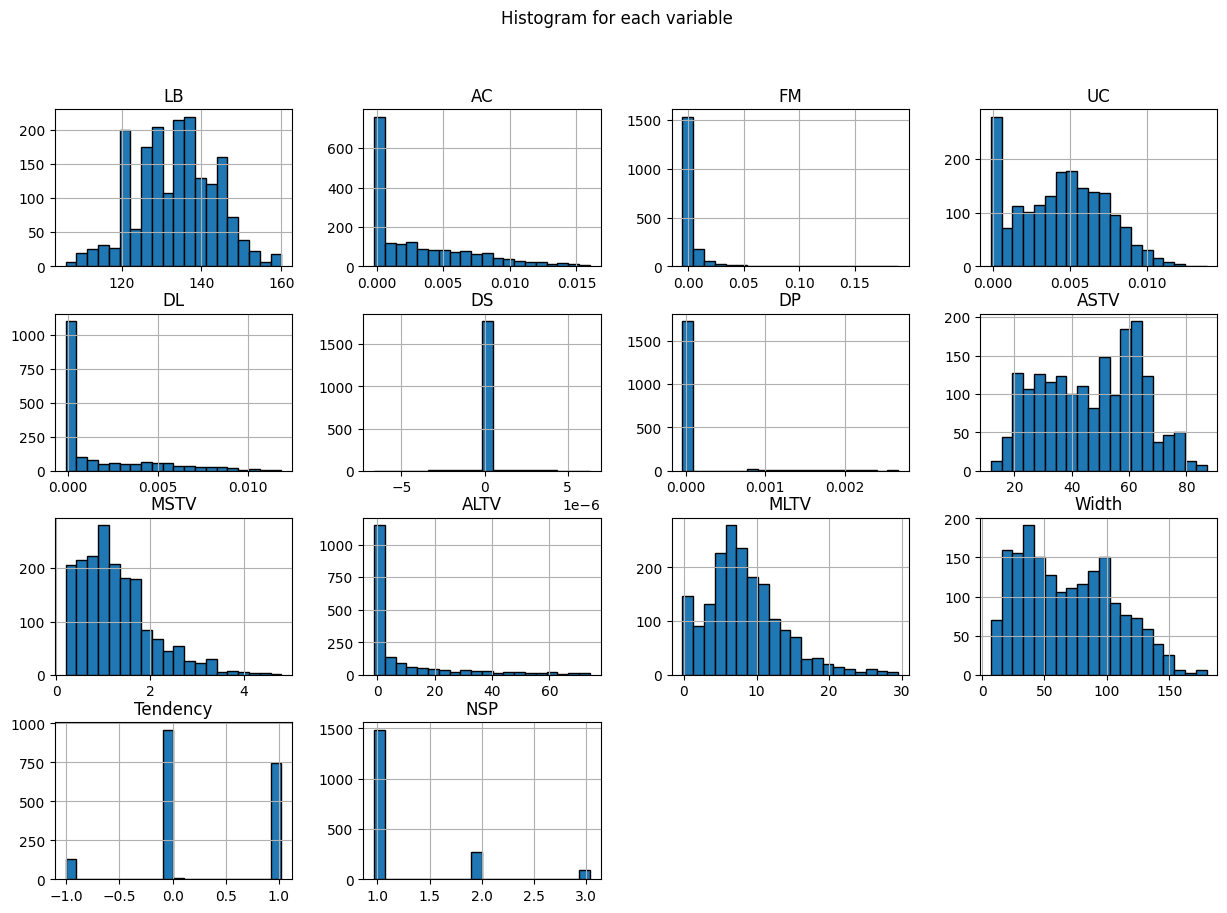

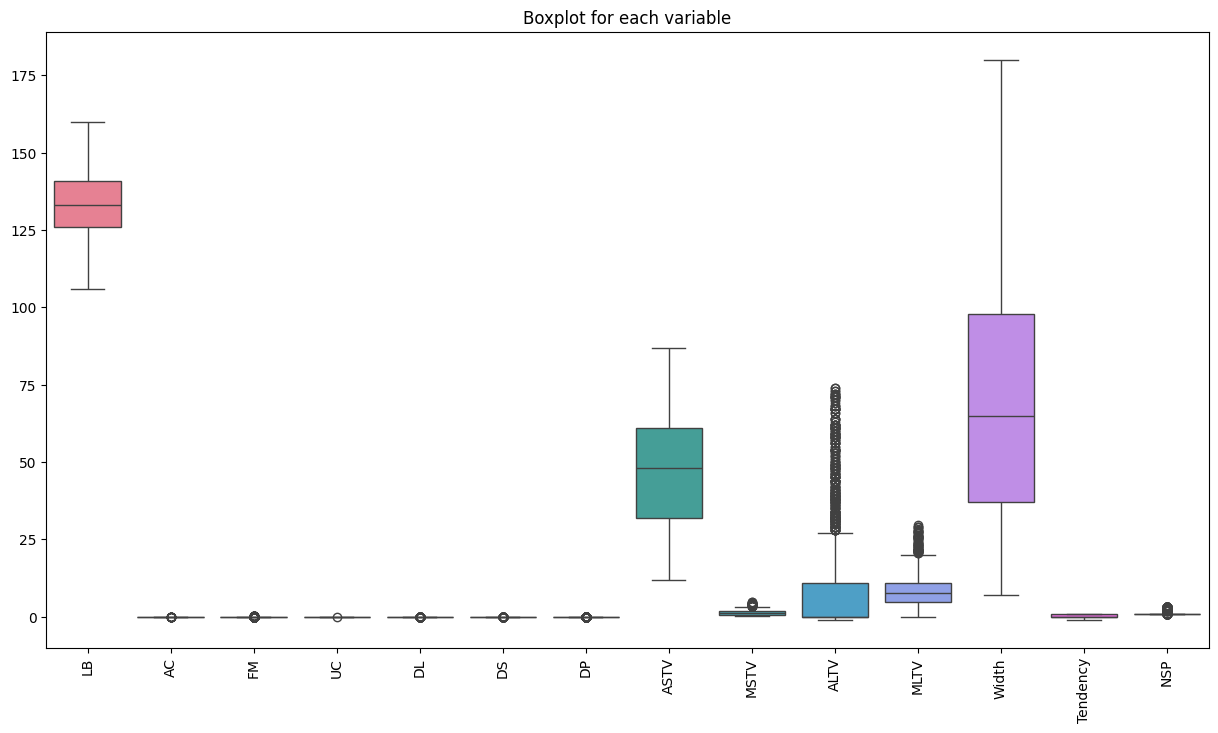

In [22]:
# Histogram for each variable
data.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histogram for each variable")
plt.show()

# Boxplot for each variable
plt.figure(figsize=(15, 8))
sns.boxplot(data=data)
plt.title("Boxplot for each variable")
plt.xticks(rotation=90)
plt.show()


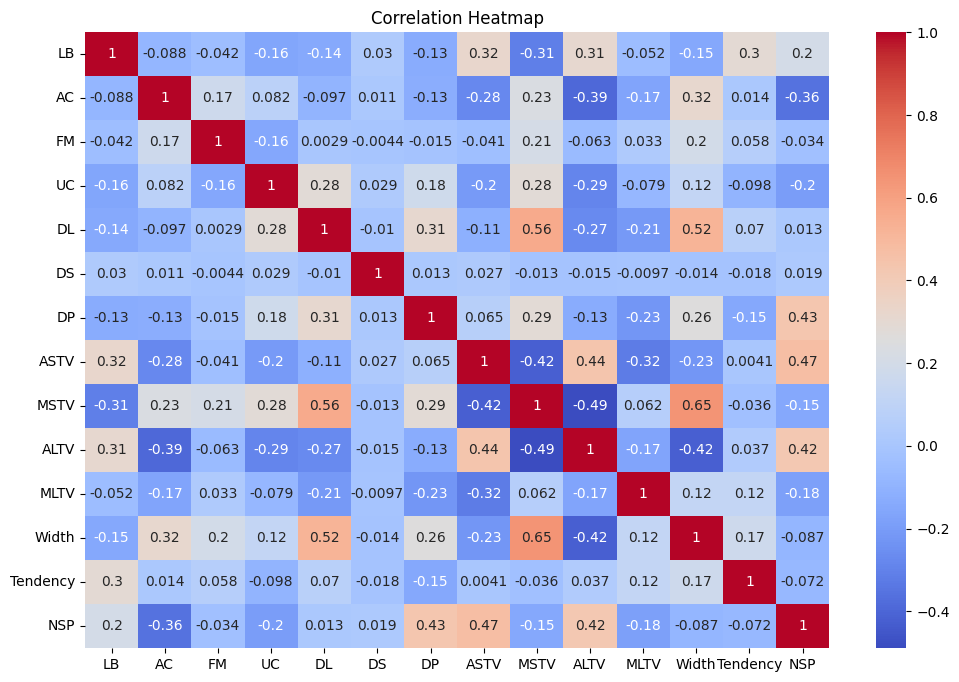

In [23]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

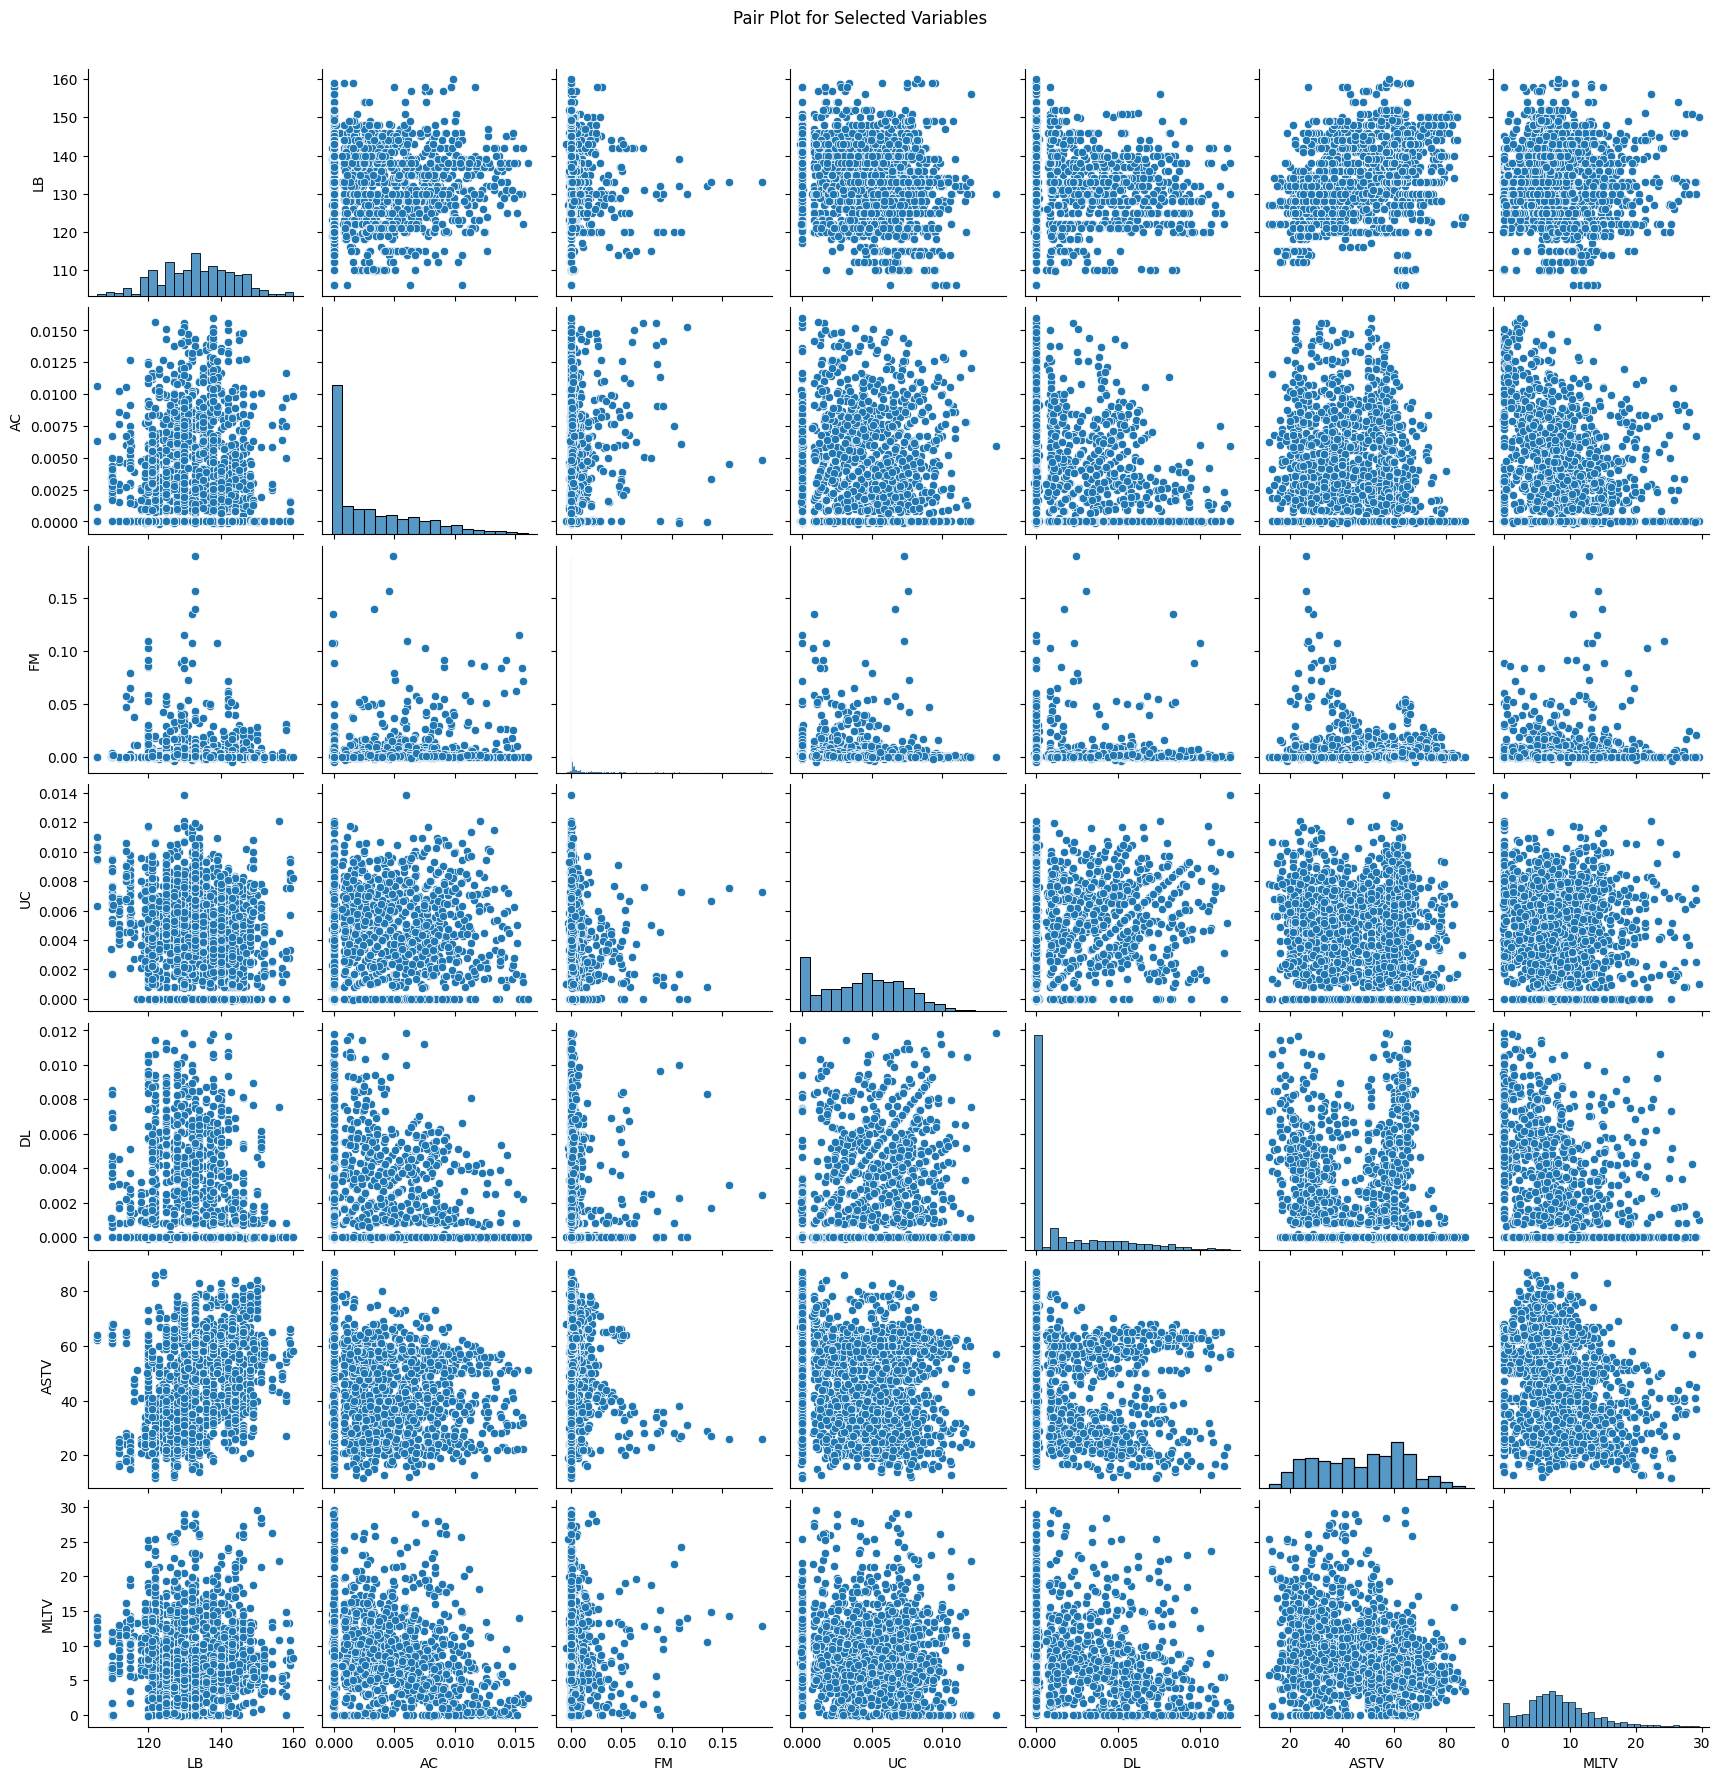

In [24]:
# Pair plot for selected variables
sns.pairplot(data[['LB', 'AC', 'FM', 'UC', 'DL', 'ASTV', 'MLTV']])
plt.suptitle("Pair Plot for Selected Variables", y=1.02)
plt.show()


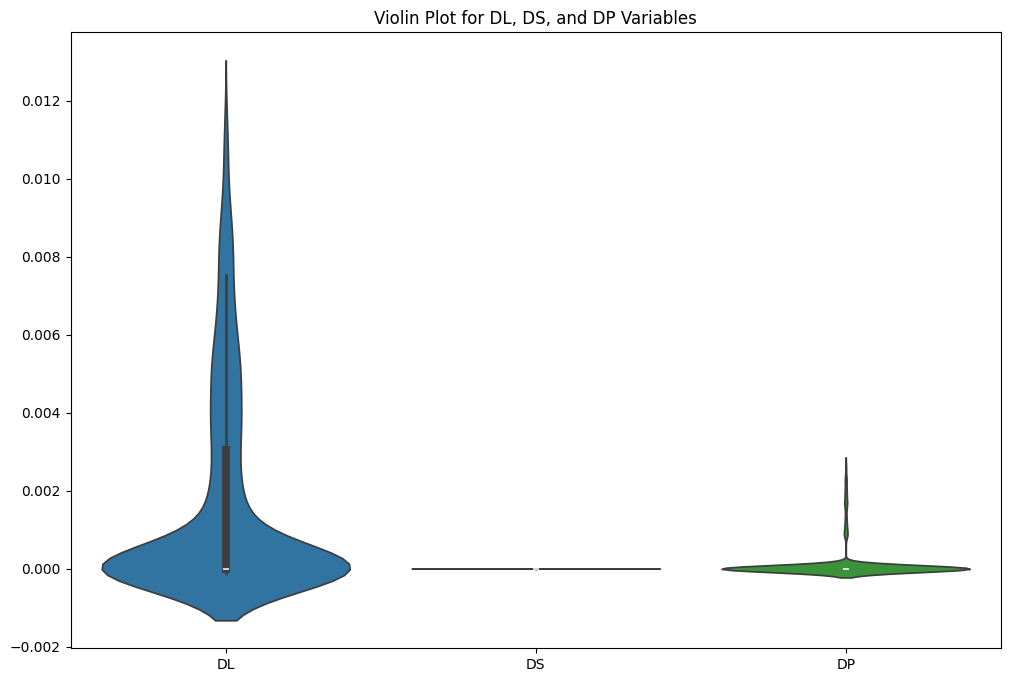

In [25]:
# Violin plot for DL, DS, DP
plt.figure(figsize=(12, 8))
sns.violinplot(data=data[['DL', 'DS', 'DP']])
plt.title("Violin Plot for DL, DS, and DP Variables")
plt.show()


#Step 7: Pattern Recognition and Insights

In [26]:
threshold = 0.5
high_correlation_vars = correlation_matrix[(correlation_matrix >= threshold) & (correlation_matrix != 1.0)]
print("Highly correlated variables:\n", high_correlation_vars)


Highly correlated variables:
           LB  AC  FM  UC        DL  DS  DP  ASTV      MSTV  ALTV  MLTV  \
LB       NaN NaN NaN NaN       NaN NaN NaN   NaN       NaN   NaN   NaN   
AC       NaN NaN NaN NaN       NaN NaN NaN   NaN       NaN   NaN   NaN   
FM       NaN NaN NaN NaN       NaN NaN NaN   NaN       NaN   NaN   NaN   
UC       NaN NaN NaN NaN       NaN NaN NaN   NaN       NaN   NaN   NaN   
DL       NaN NaN NaN NaN       NaN NaN NaN   NaN  0.563015   NaN   NaN   
DS       NaN NaN NaN NaN       NaN NaN NaN   NaN       NaN   NaN   NaN   
DP       NaN NaN NaN NaN       NaN NaN NaN   NaN       NaN   NaN   NaN   
ASTV     NaN NaN NaN NaN       NaN NaN NaN   NaN       NaN   NaN   NaN   
MSTV     NaN NaN NaN NaN  0.563015 NaN NaN   NaN       NaN   NaN   NaN   
ALTV     NaN NaN NaN NaN       NaN NaN NaN   NaN       NaN   NaN   NaN   
MLTV     NaN NaN NaN NaN       NaN NaN NaN   NaN       NaN   NaN   NaN   
Width    NaN NaN NaN NaN  0.520442 NaN NaN   NaN  0.646005   NaN   NaN   
Tendency